### Logistic Regression:
    Logistic Regression uses Sigmoid function(also called Logistic function)
    Logistic Regression = Logistic function + Regression function
    
                Sigmoid function g(z) = 1 / (1 + e^-z)  --- (1) ranges from 0 to 1 (s shaped curve) 0<=g(z)<=1
                Regression function f_wb(X)_wb = w. x + b
                Let's denote f(X) as z => z = w.x+ b    --- (2)
            
            A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:
        
        Model Representation of Logistic Regression f_wb(X) = g(w.x + b) ---- from (1) and (2) we can say that z = w.x+b
                                                                   
                                                             = 1 / (1 + e^-(w.x + b))
                                                                   
                                                             = P(y=1 | x; w,b) [sometimes logistic regression written like this]
             

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';

In [14]:
#np.exp
np.set_printoptions(precision=3)

x = 1 #single input
e_x = np.exp(x) #returns scalar
print(f"Input (x) : {x} , Output (e^x): {e_x:.3f}")

x = np.arange(-11, 20) #array input
e_x = np.exp(x) #returns array
print(type(e_x))
print(e_x[:5])
print("    Input (x),     Output (e^x)")
print(np.c_[x, e_x])

Input (x) : 1 , Output (e^x): 2.718
<class 'numpy.ndarray'>
[1.670e-05 4.540e-05 1.234e-04 3.355e-04 9.119e-04]
    Input (x),     Output (e^x)
[[-1.100e+01  1.670e-05]
 [-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.355e-04]
 [-7.000e+00  9.119e-04]
 [-6.000e+00  2.479e-03]
 [-5.000e+00  6.738e-03]
 [-4.000e+00  1.832e-02]
 [-3.000e+00  4.979e-02]
 [-2.000e+00  1.353e-01]
 [-1.000e+00  3.679e-01]
 [ 0.000e+00  1.000e+00]
 [ 1.000e+00  2.718e+00]
 [ 2.000e+00  7.389e+00]
 [ 3.000e+00  2.009e+01]
 [ 4.000e+00  5.460e+01]
 [ 5.000e+00  1.484e+02]
 [ 6.000e+00  4.034e+02]
 [ 7.000e+00  1.097e+03]
 [ 8.000e+00  2.981e+03]
 [ 9.000e+00  8.103e+03]
 [ 1.000e+01  2.203e+04]
 [ 1.100e+01  5.987e+04]
 [ 1.200e+01  1.628e+05]
 [ 1.300e+01  4.424e+05]
 [ 1.400e+01  1.203e+06]
 [ 1.500e+01  3.269e+06]
 [ 1.600e+01  8.886e+06]
 [ 1.700e+01  2.415e+07]
 [ 1.800e+01  6.566e+07]
 [ 1.900e+01  1.785e+08]]


In [16]:
#sigmoid function
def sigmoid(z):
    """
    Calculates the sigmoid for given input z
    Args:
    z (ndarray) : A scalar, numpy array of any size
    
    Returns:
    g (ndarray) : sigmoid(z), with same as shape as z
    """
    
    g = 1 / (1 + np.exp(-z))
    
    return g

In [18]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10, 11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

#The values in the left column are z, and the values in the right column are sigmoid(z).
#As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1.

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


In [49]:
# Draws a threshold at 0.5
from matplotlib.patches import FancyArrowPatch

def draw_vthresh(ax, x):
    """ draws a threshold """
    ylim = ax.get_ylim() #limits of x axis [-11 , 11]
    xlim = ax.get_xlim() #limits of y axis [-0.4, 1.1]
    
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue) #blue colored area
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred) # red colored area
    
    ax.annotate("z >= 0", xy=[x, 0.5], xycoords='data',
                xytext=[30, 5], textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    
    ax.annotate("z < 0", xy=[x, 0.5], xycoords='data',
                 xytext=[-50, 5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)

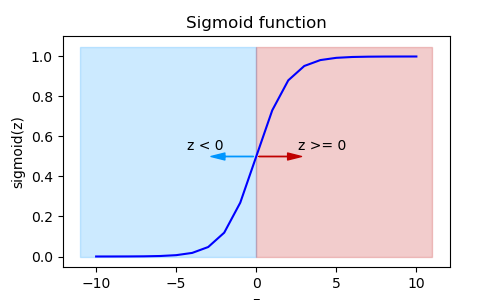

In [52]:
#plotting the z and sigmoid g(z)
#data
z_tmp = np.arange(-10, 11)
y = sigmoid(z_tmp)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z_tmp, y, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)
plt.show()

#As you can see, the sigmoid function approaches 0 as z goes to large negative values and approaches 1 as z goes to large positive values.

In [2]:
#classification data with linear regression model
import time
import copy
import math
from ipywidgets import Output
from matplotlib.widgets import Button, CheckButtons
from matplotlib.patches import FancyArrowPatch
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
%matplotlib widget
# for debug
output = Output() # sends hidden error messages to display when using widgets
display(output)

def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + np.log(1 + np.exp(z)) #log1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0, 0]                                                       # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar

def compute_gradient_matrix(X, y, w, b, logistic=False, lambda_=0):
    """
    Computes the gradient using matrices

    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameters of the model
      b : (scalar )                       Values of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
    Returns
      dj_dw: (array_like Shape (n,1))     The gradient of the cost w.r.t. the parameters w
      dj_db: (scalar)                     The gradient of the cost w.r.t. the parameter b
    """
    m = X.shape[0]
    y = y.reshape(-1, 1)             # ensure 2D
    w = w.reshape(-1, 1)             # ensure 2D

    f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b      # (m,n)(n,1) = (m,1)
    err   = f_wb - y                                              # (m,1)
    dj_dw = (1/m) * (X.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    dj_dw += (lambda_/m) * w        # regularize                  # (n,1)

    return dj_db, dj_dw                                           # scalar, (n,1)

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray):    Shape (m,n)         matrix of examples
      y (ndarray):    Shape (m,) or (m,1) target value of each example
      w_in (ndarray): Shape (n,) or (n,1) Initial values of parameters of the model
      b_in (scalar):                      Initial value of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
      alpha (float):                      Learning rate
      num_iters (int):                    number of iterations to run gradient descent

    Returns:
      w (ndarray): Shape (n,) or (n,1)    Updated values of parameters; matches incoming shape
      b (scalar):                         Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_matrix(X, y, w, b, logistic, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing

class plt_one_addpt_onclick:
    """ class to run one interactive plot """
    def __init__(self, x, y, w, b, logistic=True):
        self.logistic=logistic
        #getting indexes
        pos = y == 1
        neg = y == 0
        #plotting
        fig,ax = plt.subplots(1, 1, figsize=(8, 4))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False

        plt.subplots_adjust(bottom=0.25)
        ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue, lw=3)
        ax.set_ylim(-0.05, 1.1)
        xlim = ax.get_xlim()
        ax.set_xlim(xlim[0], xlim[1]*2)
        ax.set_ylabel('y')
        ax.set_xlabel('Tumor Size')
        self.alegend = ax.legend(loc='lower right')
        if self.logistic:
            ax.set_title("Example of Logistic Regression on Categorical Data")
        else:
            ax.set_title("Example of Linear Regression on Categorical Data")

        ax.text(0.65, 0.8, "[Click to add data points]", size=10, transform=ax.transAxes)

        axcalc   = plt.axes([0.1, 0.05, 0.38, 0.075])  #l,b,w,h
        axthresh = plt.axes([0.5, 0.05, 0.38, 0.075])  #l,b,w,h
        self.tlist = []

        self.fig = fig
        self.ax = [ax, axcalc, axthresh]
        self.x = x
        self.y = y
        self.w = copy.deepcopy(w)
        self.b = b
        f_wb = np.matmul(self.x.reshape(-1, 1), self.w) + self.b #regression function
        if self.logistic:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)
            self.bline = self.ax[0].plot(self.x, f_wb, color=dlorange,lw=1)
        else:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)

        self.cid = fig.canvas.mpl_connect('button_press_event', self.add_data)
        if self.logistic:
            self.bcalc = Button(axcalc, 'Run Logistic Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_logistic)
        else:
            self.bcalc = Button(axcalc, 'Run Linear Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_linear)
        self.bthresh = CheckButtons(axthresh, ('Toggle 0.5 threshold (after regression)',))
        self.bthresh.on_clicked(self.thresh)
        self.resize_sq(self.bthresh)

 #   @output.capture()  # debug
    def add_data(self, event):
        #self.ax[0].text(0.1,0.1, f"in onclick")
        if event.inaxes == self.ax[0]:
            x_coord = event.xdata
            y_coord = event.ydata

            if y_coord > 0.5:
                self.ax[0].scatter(x_coord, 1, marker='x', s=80, c = 'red' )
                self.y = np.append(self.y,1)
            else:
                self.ax[0].scatter(x_coord, 0, marker='o', s=100, facecolors='none', edgecolors=dlblue,lw=3)
                self.y = np.append(self.y, 0)
            self.x = np.append(self.x, x_coord)
        self.fig.canvas.draw()

    @output.capture()  # debug
    def calc_linear(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1, 1, 1, 1, 1, 2, 4, 8, 16, 32, 64, 128, 256]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.01, it,
                                                 logistic=False, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.alegend.remove()
            y_hat = np.matmul(self.x.reshape(-1, 1), self.w) + self.b
            self.aline = self.ax[0].plot(self.x, y_hat, color=dlblue,
                                         label=f"y = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()
    
    @output.capture() #debug
    def calc_logistic(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()
            xlim  = self.ax[0].get_xlim()
            x_hat = np.linspace(*xlim, 30)
            y_hat = sigmoid(np.matmul(x_hat.reshape(-1,1), self.w) + self.b)
            self.aline = self.ax[0].plot(x_hat, y_hat, color=dlblue,
                                         label="y = sigmoid(z)")
            f_wb = np.matmul(x_hat.reshape(-1,1), self.w) + self.b
            self.bline = self.ax[0].plot(x_hat, f_wb, color=dlorange, lw=1,
                                         label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()


    def thresh(self, event):
        if self.bthresh.get_status()[0]:
            #plt.figtext(0,0, f"in thresh {self.bthresh.get_status()}")
            self.draw_thresh()
        else:
            #plt.figtext(0,0.3, f"in thresh {self.bthresh.get_status()}")
            self.remove_thresh()

    def draw_thresh(self):
        ws = np.squeeze(self.w)
        xp5 = -self.b/ws if self.logistic else (0.5 - self.b) / ws
        ylim = self.ax[0].get_ylim()
        xlim = self.ax[0].get_xlim()
        a = self.ax[0].fill_between([xlim[0], xp5], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
        b = self.ax[0].fill_between([xp5, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
        c = self.ax[0].annotate("Malignant", xy= [xp5,0.5], xycoords='data',
             xytext=[30,5],textcoords='offset points')
        d = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5+1.5, 0.5), color=dldarkred,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(d)

        e = self.ax[0].annotate("Benign", xy= [xp5,0.5], xycoords='data',
                     xytext=[-70,5],textcoords='offset points', ha='left')
        f = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5-1.5, 0.5), color=dlblue,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(f)
        self.tlist = [a,b,c,d,e,f]

        self.fig.canvas.draw()

    def remove_thresh(self):
        #plt.figtext(0.5,0.0, f"rem thresh {self.bthresh.get_status()}")
        for artist in self.tlist:
            artist.remove()
        self.fig.canvas.draw()

    def resize_sq(self, bcid):
        """ resizes the check box """
        #future reference
        #print(f"width  : {bcid.rectangles[0].get_width()}")
        #print(f"height : {bcid.rectangles[0].get_height()}")
        #print(f"xy     : {bcid.rectangles[0].get_xy()}")
        #print(f"bb     : {bcid.rectangles[0].get_bbox()}")
        #print(f"points : {bcid.rectangles[0].get_bbox().get_points()}")  #[[xmin,ymin],[xmax,ymax]]

        h = bcid.rectangles[0].get_height()
        bcid.rectangles[0].set_height(3*h)

        ymax = bcid.rectangles[0].get_bbox().y1
        ymin = bcid.rectangles[0].get_bbox().y0

        bcid.lines[0][0].set_ydata([ymax,ymin])
        bcid.lines[0][1].set_ydata([ymin,ymax])

Output()

    #Try the following steps:

    - Click on 'Run Logistic Regression' to find the best logistic regression model for the given training data
    - Note the resulting model fits the data quite well.
    
    Note, the orange line is 'z' or 'w.x + b'. It does not match the line in a linear regression model.
    
    Further improve these results by applying a threshold.

    - Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good. The predictions match the data
    - Now, add further data points in the large tumor size range (near 10), and re-run logistic regression.
    - unlike the linear regression model, this model continues to make correct predictions

C:\Users\malla\AppData\Local\Temp\ipykernel_10720\2554114847.py:311: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  h = bcid.rectangles[0].get_height()
C:\Users\malla\AppData\Local\Temp\ipykernel_10720\2554114847.py:312: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  bcid.rectangles[0].set_height(3*h)
C:\Users\malla\AppData\Local\Temp\ipykernel_10720\2554114847.py:314: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  ymax = bcid.rectangles[0].get_bbox().y1
C:\Users\malla\AppData\Local\Temp\ipykernel_10720\2554114847.py:315: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotli

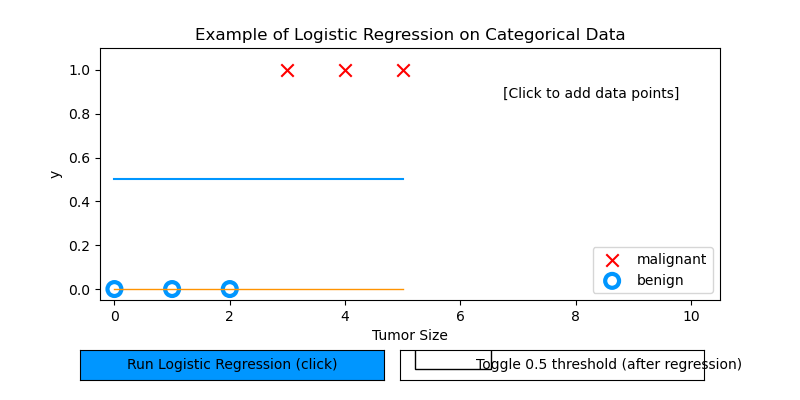

In [3]:
#Logistic Regression
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0
plt.close('all')
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)